<a href="https://colab.research.google.com/github/rahul-727/BH-task3/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [ ]:
iris = load_iris()

Create a Dataframe

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


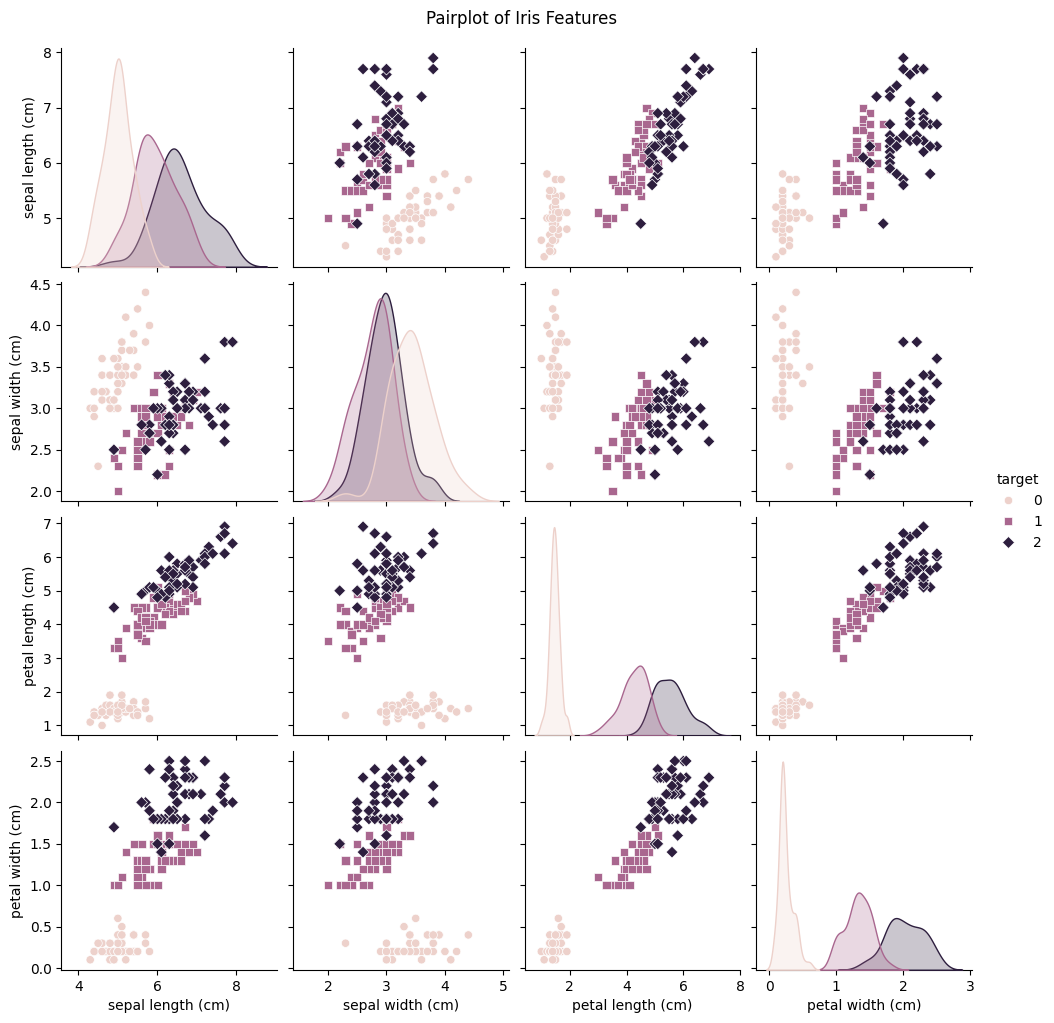

In [ ]:
# Pairplot to visualize the relationships between features
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

 Preprocess the Data

In [ ]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Model

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



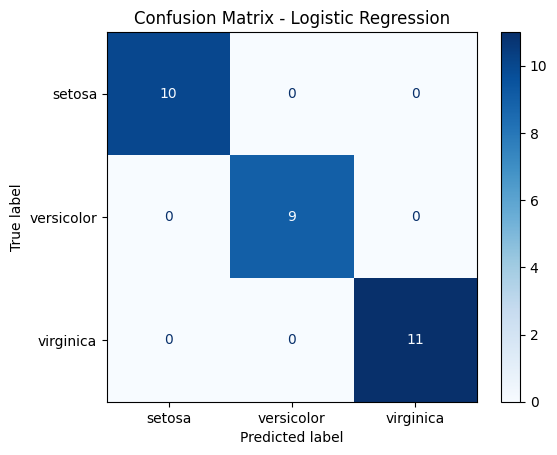

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Neural network for classification

In [ ]:
# Convert target labels to categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Build the model
model_tf = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_tf.fit(X_train, y_train_categorical, epochs=50, batch_size=5, verbose=1, validation_split=0.2)


Epoch 1/50
20/20 [==============================] - 1s 13ms/step - loss: 0.9120 - accuracy: 0.6042 - val_loss: 0.7437 - val_accuracy: 0.7083
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.8333 - accuracy: 0.6354 - val_loss: 0.6897 - val_accuracy: 0.7083
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.7665 - accuracy: 0.7500 - val_loss: 0.6425 - val_accuracy: 0.8333
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.7917 - val_loss: 0.6038 - val_accuracy: 0.8333
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.8229 - val_loss: 0.5696 - val_accuracy: 0.7917
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.8229 - val_loss: 0.5372 - val_accuracy: 0.7917
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.8229 - val_loss: 0.5093 - val_accuracy: 0.7917
Epoch 8/50
20/20 [=

In [ ]:
# Evaluate the model
loss, accuracy = model_tf.evaluate(X_test, y_test_categorical, verbose=0)
print(f'Test accuracy: {accuracy}')

# Predict and evaluate
y_pred_tf = model_tf.predict(X_test)
y_pred_classes = y_pred_tf.argmax(axis=1)
print(classification_report(y_test, y_pred_classes))

Test accuracy: 1.0
1/1 [==============================] - 0s 60ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



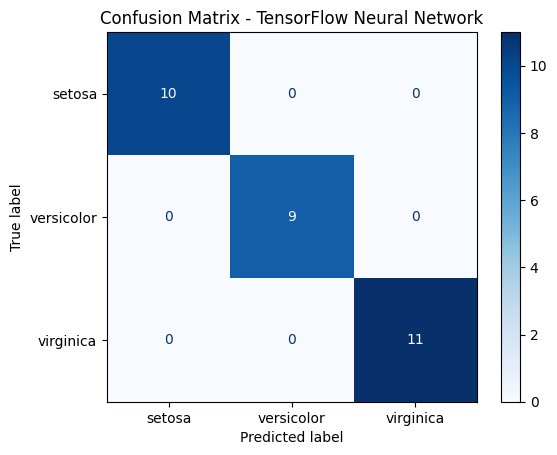

In [ ]:
# Confusion matrix
cm_tf = confusion_matrix(y_test, y_pred_classes)
disp_tf = ConfusionMatrixDisplay(confusion_matrix=cm_tf, display_labels=iris.target_names)
disp_tf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - TensorFlow Neural Network')
plt.show()

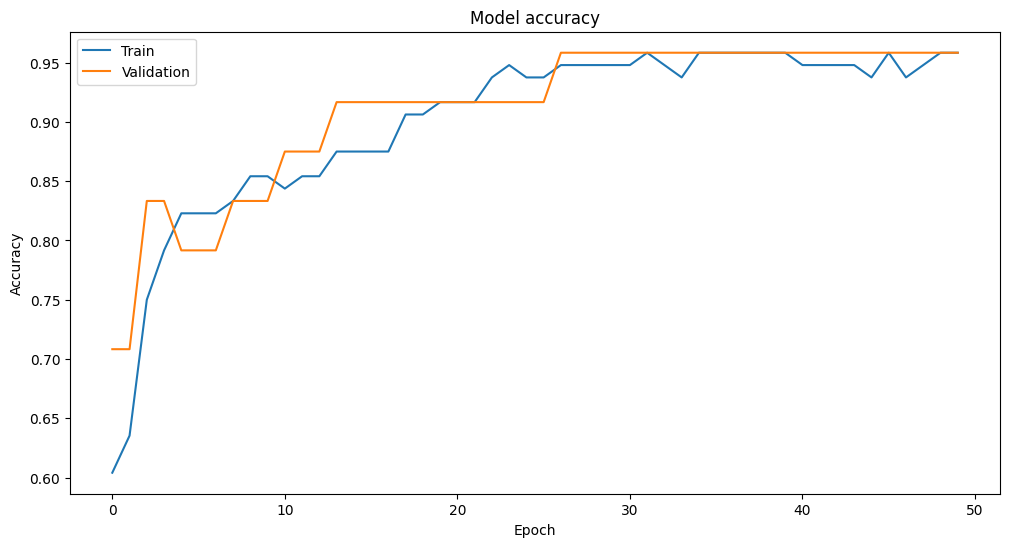

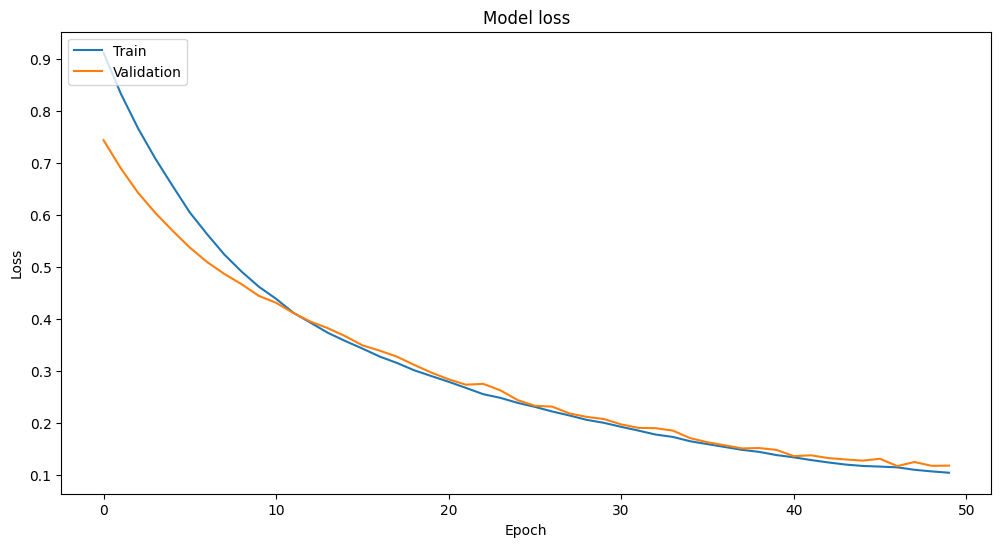

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()